## Notebook for playing around with variables in experimental and master objects

In [19]:
%run ./rob_setup_notebook.ipynb

import utils.interareal_analysis as ia
import utils.interareal_plotting as ip
import utils.utils_funcs as uf
from ia_funcs import *

from utils.paq2py import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Suite2p path: ['/home/rlees/Documents/Code/suite2p/suite2p']
QNAP_path: /home/rlees/mnt/qnap 
QNAP_data_path /home/rlees/mnt/qnap/Data 
Pickle folder: /home/rlees/mnt/qnap/pkl_files 
Master pickle: /home/rlees/mnt/qnap/master_pkl/master_obj.pkl 
Figure save path: /home/rlees/mnt/qnap/Analysis/Plots 
STA movie save path: /home/rlees/mnt/qnap/Analysis/STA_movies 
S2 borders path: /home/rlees/mnt/qnap/Analysis/S2_borders


### Add or check attributes in all exp_obj pkl files

In [ ]:
pkl_files = os.listdir(pkl_folder)

for i,pkl in enumerate(pkl_files):
    if 'J061.pkl' in pkl:
        
        pkl_path = os.path.join(pkl_folder, pkl)

        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
#             with open(pkl_path, 'wb') as f:
#                 pickle.dump(exp_obj, f)
                
#         pkl_list = [exp_obj.photostim_r, exp_obj.photostim_s]

#         if exp_obj.spont.n_frames > 0:
#             pkl_list.append(exp_obj.spont)

#         if exp_obj.whisker_stim.n_frames > 0:
#             pkl_list.append(exp_obj.whisker_stim)
        
#         for sub_obj in pkl_list:

### Play with data from individual experimental objects

In [2]:
# List of pickle object file names
# '2019-06-11_J048',
# '2019-06-13_J052',
# '2019-06-25_RL048',
# '2019-07-15_RL052',
# '2019-08-14_J058',
# '2019-08-14_J059',
# '2019-08-15_RL055',
# '2019-11-14_J061',
# '2019-11-14_J063',
# '2019-11-15_J064',
# '2019-11-18_J065',
# '2020-02-27_RL075',
# '2020-03-03_RL074',
# '2020-03-05_RL070',
# '2020-03-05_RL072',
# '2020-03-12_RL070',
# '2020-03-16_RL074',
# '2020-03-19_RL075',
# '2020-03-20_RL080'

pkl_path = os.path.join(pkl_folder, '2019-11-14_J061.pkl')

with open(pkl_path, 'rb') as f:
    exp_obj = pickle.load(f)
    
print('Loaded pickled object.')

Loaded pickled object.


### Show all attributes in exp_obj or sub_objs

In [ ]:
# Show all attributes in exp_obj or sub_objs
print('Session object attributes')
for key, value in vars(exp_obj).items():
    print(key)

print('\nExperimental object attributes')
for key, value in vars(exp_obj.photostim_r).items():
    print(key)

In [21]:
def plotExpAvgDff(sub_obj, threshold, cell_ids=False):
    
    if not cell_ids:
        cell_ids = range(sub_obj.all_trials[0].shape[0])
        
    # all trials for all cells of interest
    cell_trials = np.array(sub_obj.all_trials[0][cell_ids][:][:])
    # mean across all trials for each cell
    cell_trial_means = np.mean(cell_trials, axis=2)

    # collapse trial mean for each cell in to one number, the overall mean dff
    cell_mean = np.mean(cell_trial_means, axis=1)
    # find mean dff greater than threshold and filter out
    extreme_means = np.where(abs(cell_mean) > threshold)
    if len(extreme_means[0]) > 0:
        print(len(extreme_means[0]), 'extreme values excluded')
    cell_trial_means = np.delete(cell_trial_means, extreme_means, axis=0)
    
    # make mean and std of traces
    grand_trial_mean = np.mean(cell_trial_means, axis=0)
    grand_trial_std = np.std(cell_trial_means, axis=0)
    grand_trial_ci = 1.960 * (grand_trial_std/np.sqrt(len(cell_ids)))
    grand_trial_sem = grand_trial_std/np.sqrt(len(cell_ids))
    
    # construct patch to cover stim artifact period
#     stim_patch = patches.Rectangle((0,-100), sub_obj.duration_frames/fps, 999, zorder=3, color='lightgrey', lw=3, ec='white')
#     ax = plt.gca()
#     ax.add_patch(stim_patch)
    
    # make x axis in continous time units instead of frames
    fps = sub_obj.fps
    x = np.array(range( -sub_obj.pre_frames , sub_obj.duration_frames + sub_obj.post_frames ))/fps
    
    # find minimum and maximum x values (for plotting)
    x_max = np.max(x)
    x_min = np.min(x)
    
    #construct plot
    plt.plot(x, grand_trial_mean, lw=3, zorder=2);
    plt.fill_between(x, grand_trial_mean + grand_trial_sem, grand_trial_mean - grand_trial_sem, alpha=0.6, zorder=1);
    plt.hlines(0, x_min, x_max, linestyles='dashed', zorder=4, alpha=0.3);
    plt.ylim([-0.15, 0.15]);
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.xlabel('time (seconds)');
    plt.ylabel('ΔF/F');
    
    return cell_trials

/home/rlees/mnt/qnap/pkl_files/2020-03-03_RL074.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-14_J061.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-14_J063.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-15_J064.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-18_J065.pkl
/home/rlees/mnt/qnap/pkl_files/2020-02-27_RL075.pkl
/home/rlees/mnt/qnap/pkl_files/2020-03-05_RL070.pkl
/home/rlees/mnt/qnap/pkl_files/2020-03-05_RL072.pkl
/home/rlees/mnt/qnap/pkl_files/2020-03-12_RL070.pkl
/home/rlees/mnt/qnap/pkl_files/2020-03-16_RL074.pkl
/home/rlees/mnt/qnap/pkl_files/2020-03-19_RL075.pkl


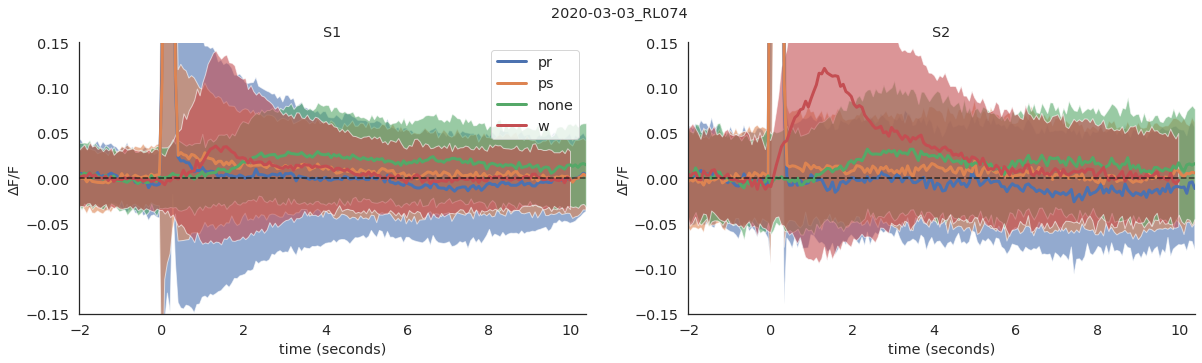

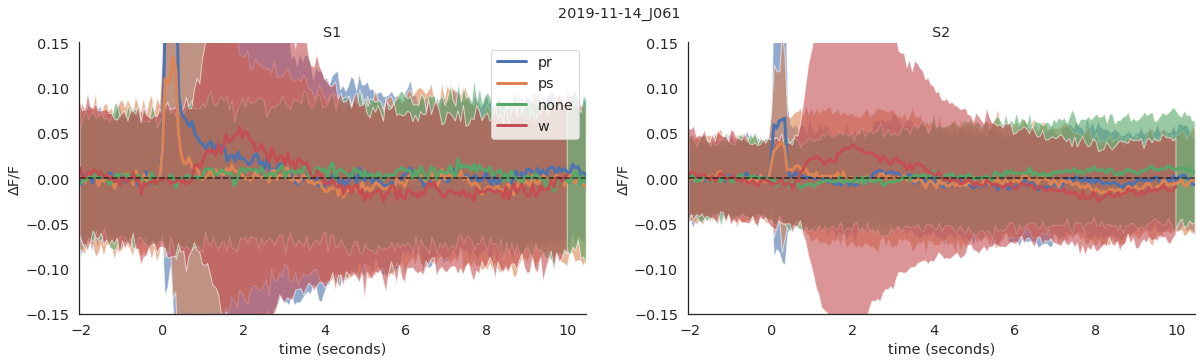

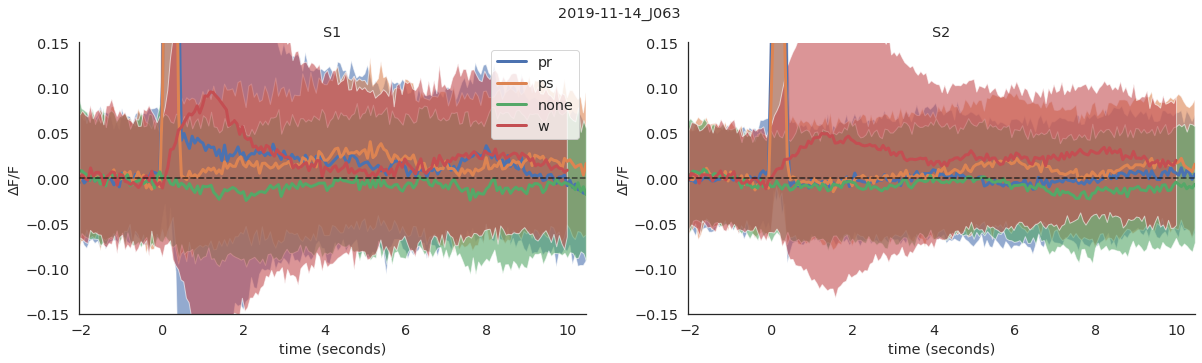

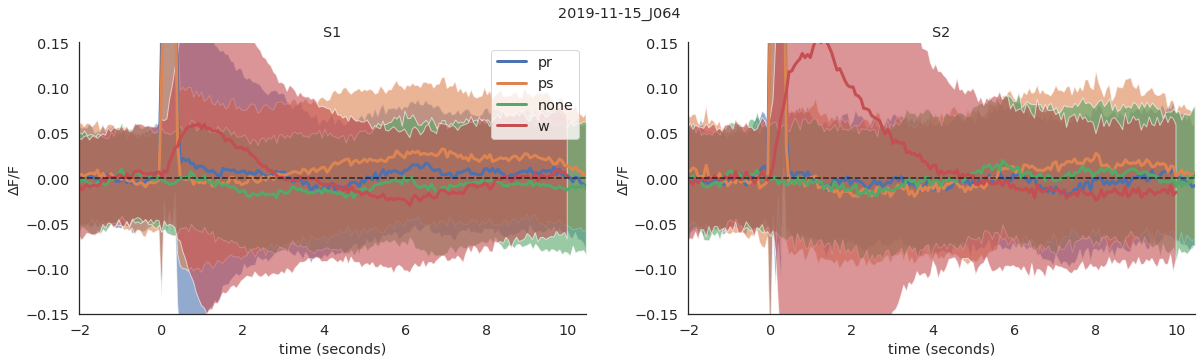

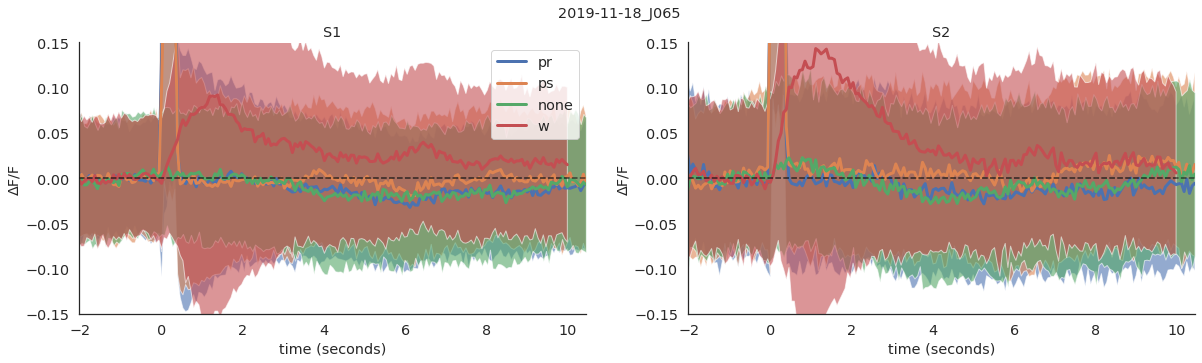

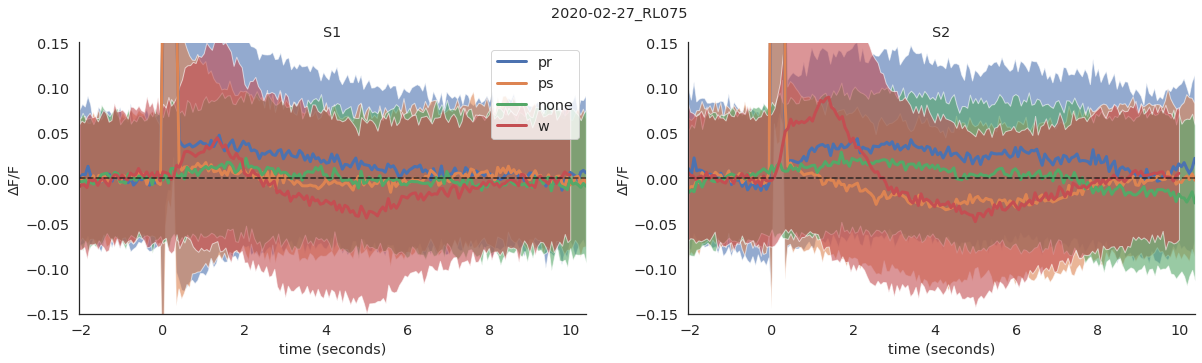

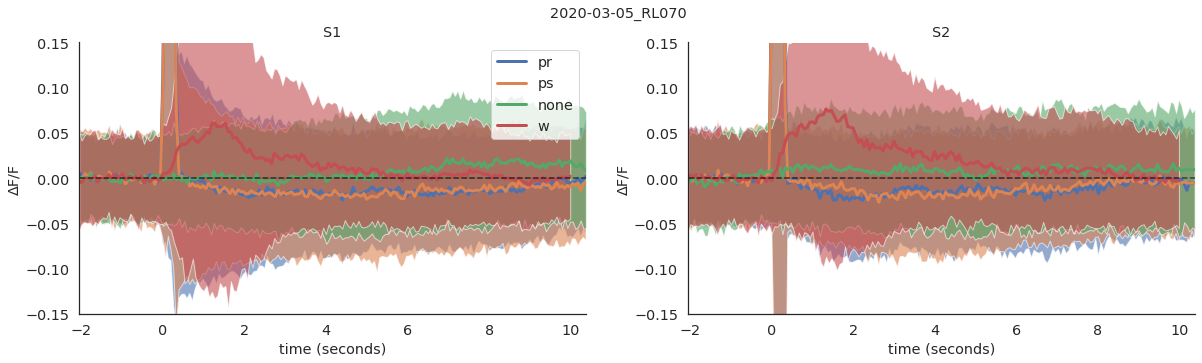

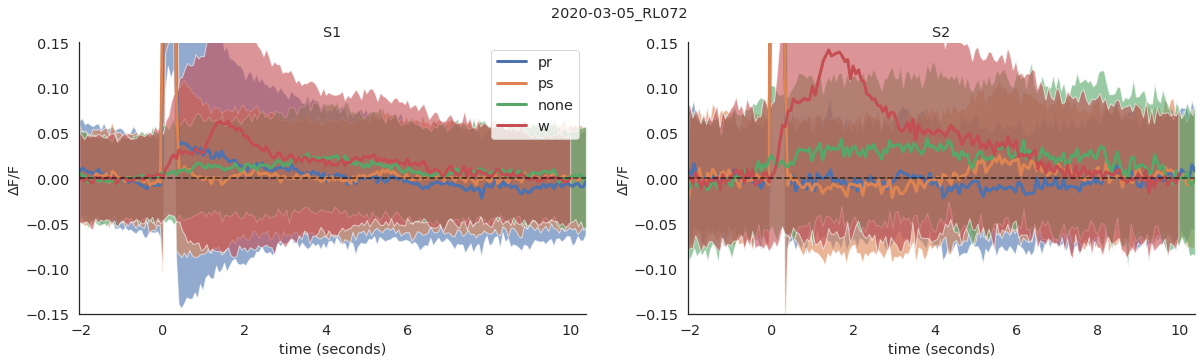

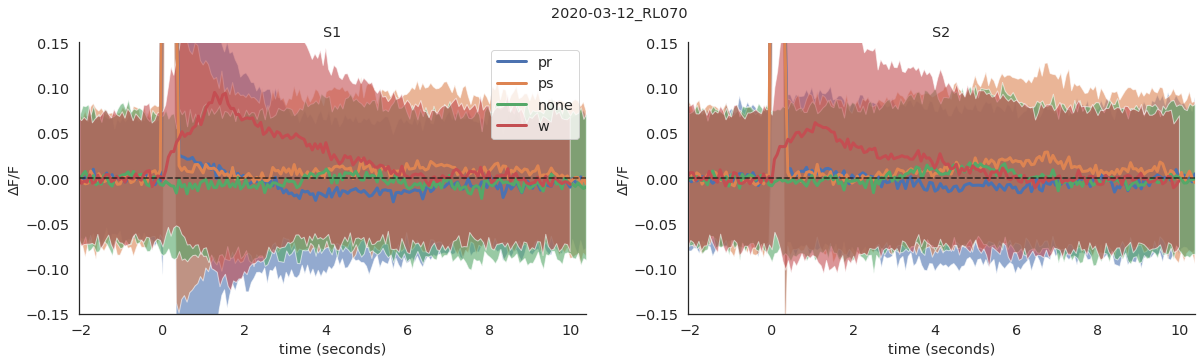

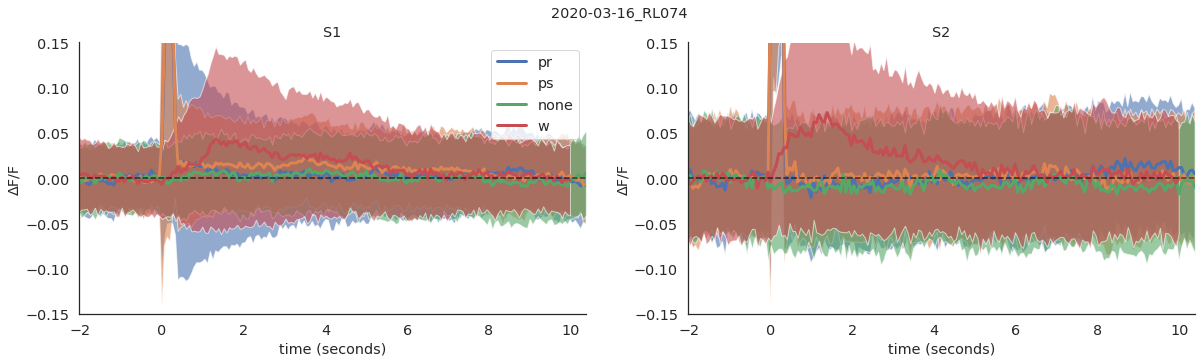

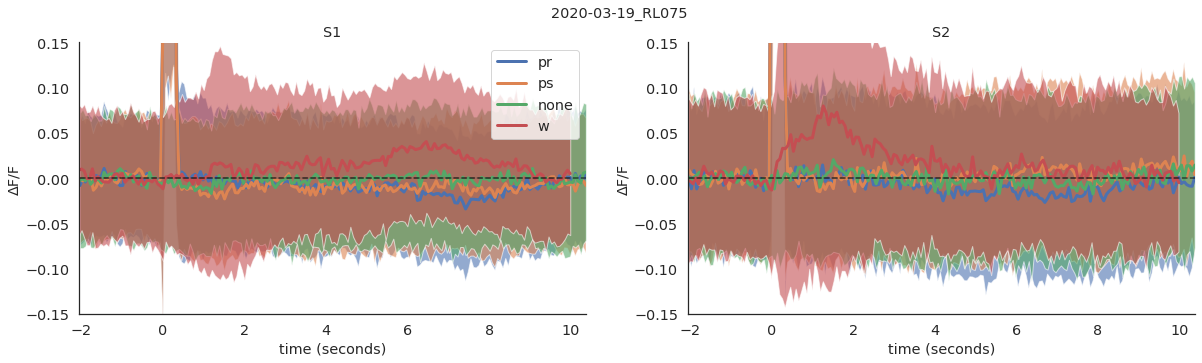

In [23]:
pkl_files = os.listdir(pkl_folder)

threshold = 10

grand_average = []

for i,pkl in enumerate(pkl_files):
    if '.pkl' in pkl:
        
        pkl_path = os.path.join(pkl_folder, pkl)
        print(pkl_path)

        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)

        pkl_list = [exp_obj.photostim_r, exp_obj.photostim_s]

        if exp_obj.spont.n_frames > 0:
            pkl_list.append(exp_obj.spont)

        if exp_obj.whisker_stim.n_frames > 0:
            pkl_list.append(exp_obj.whisker_stim)
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
        labels = []
        
        for i, ax_id in enumerate([1,0]):
            
            in_s1 = np.array(exp_obj.photostim_r.cell_s1[0])
            cell_ids = np.where(in_s1 == i)
            
            plt.sca(ax[ax_id])
            plt.title('S' + str(ax_id+1))
            
            for sub_obj in pkl_list:
            
                labels.append(sub_obj.stim_type)
                cell_trials = plotExpAvgDff(sub_obj, threshold, cell_ids=cell_ids)
                grand_average.append(cell_trials)
        
        fig.suptitle(sub_obj.sheet_name)
        plt.legend(labels[:4], loc='upper right')
#         plt.savefig(os.path.join(fig_save_path, exp_obj.sheet_name + '_grand_trial_avg_s1s2.png'))
#         plt.savefig(os.path.join(fig_save_path, exp_obj.sheet_name + '_grand_trial_avg_s1s2.svg'))

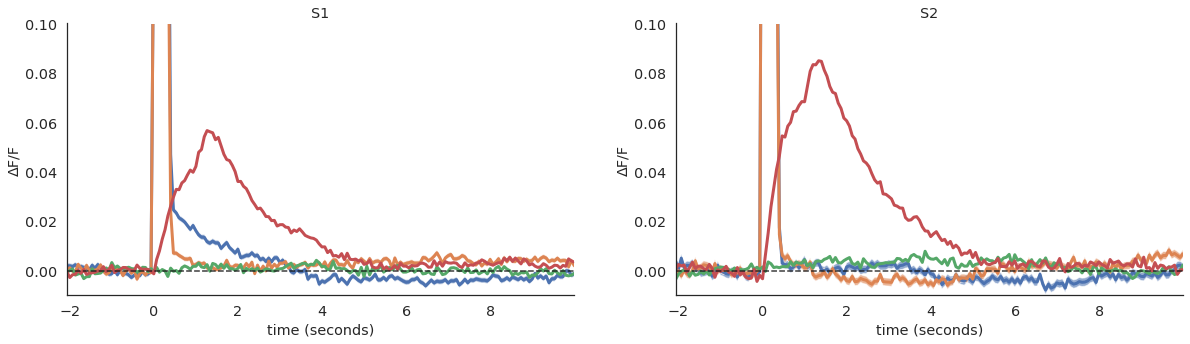

In [94]:
# grand_average[0].shape

min_frames = np.inf
for avg in grand_average:
    curr_frames = np.size(avg, axis=1)
    if curr_frames < min_frames:
        min_frames = curr_frames
        
s2_pr = np.concatenate(np.array([avg[:,:frames] for avg in grand_average[::8]]), axis=0)
s2_ps = np.concatenate(np.array([avg[:,:frames] for avg in grand_average[1::8]]), axis=0)
s2_none = np.concatenate(np.array([avg[:,:frames] for avg in grand_average[2::8]]), axis=0)
s2_w = np.concatenate(np.array([avg[:,:frames] for avg in grand_average[3::8]]), axis=0)

s1_pr = np.concatenate(np.array([avg[:,:frames] for avg in grand_average[4::8]]), axis=0)
s1_ps = np.concatenate(np.array([avg[:,:frames] for avg in grand_average[5::8]]), axis=0)
s1_none = np.concatenate(np.array([avg[:,:frames] for avg in grand_average[6::8]]), axis=0)
s1_w = np.concatenate(np.array([avg[:,:frames] for avg in grand_average[7::8]]), axis=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

plt.sca(ax[0])
plt.title('S1')

for trials in [s1_pr, s1_ps, s1_none, s1_w]:
    
    grand_mean = np.mean(trials, axis=0)
    grand_std = np.std(grand_mean, axis=0)
    grand_ci = 1.960 * (grand_std/np.sqrt(trials.shape[0]))
    grand_sem = grand_std/np.sqrt(trials.shape[0])

    fps = sub_obj.fps
    x = np.array(range( -sub_obj.pre_frames , sub_obj.duration_frames + sub_obj.post_frames ))/fps

    # find minimum and maximum x values (for plotting)
    x_max = np.max(x)
    x_min = np.min(x)

    #construct plot
    plt.plot(x, grand_mean, lw=3, zorder=2);
    plt.fill_between(x, grand_mean + grand_std, grand_mean - grand_std, alpha=0.6, zorder=1);
    plt.hlines(0, x_min, x_max, linestyles='dashed', zorder=4, alpha=0.3);
    plt.ylim([-0.01, 0.1]);
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.xlabel('time (seconds)');
    plt.ylabel('ΔF/F');
    
plt.sca(ax[1])
plt.title('S2')

for trials in [s2_pr, s2_ps, s2_none, s2_w]:
    
    grand_mean = np.mean(trials, axis=0)
    grand_std = np.std(grand_mean, axis=0)
    grand_ci = 1.960 * (grand_std/np.sqrt(trials.shape[0]))
    grand_sem = grand_std/np.sqrt(trials.shape[0])

    fps = sub_obj.fps
    x = np.array(range( -sub_obj.pre_frames , sub_obj.duration_frames + sub_obj.post_frames ))/fps

    # find minimum and maximum x values (for plotting)
    x_max = np.max(x)
    x_min = np.min(x)

    #construct plot
    plt.plot(x, grand_mean, lw=3, zorder=2);
    plt.fill_between(x, grand_mean + grand_std, grand_mean - grand_std, alpha=0.6, zorder=1);
    plt.hlines(0, x_min, x_max, linestyles='dashed', zorder=4, alpha=0.3);
    plt.ylim([-0.01, 0.1]);
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.xlabel('time (seconds)');
    plt.ylabel('ΔF/F');
    
plt.savefig(os.path.join(fig_save_path, 'grand_mean_std_s1s2.png'))
plt.savefig(os.path.join(fig_save_path, 'grand_mean_std_s1s2.svg'))

### Play with whisker stim data

In [ ]:
# Calculate the number of cells that responded both to whisker stim and photostim

# a = np.where(exp_obj.whisker_stim.sta_sig[0])
# b = np.where(exp_obj.photostim_r.sta_sig[0])
# print(a,b)
# sum(1 for i in b[0] if i in a[0])

# Plot whisker stim trials where cells went over 200 dFF

plt.figure(figsize=(5,10))
sta_mean = []

for i, sta in enumerate(exp_obj.whisker_stim.stas[0]):
    if exp_obj.whisker_stim.sta_sig[0][i]:
        plt.plot(sta, alpha=0.2)
        sta_mean.append(sta)
    
        if exp_obj.whisker_stim.sta_amplitudes[0][i] > 200:
            print(exp_obj.whisker_stim.cell_id[0][i])
            
sta_mean = np.mean(sta_mean, axis=0)

plt.plot(sta_mean, 'k', linewidth=2);

plt.axis([0, 55, -10, 300]);

### Play with dataframes from master object

In [ ]:
with open(master_path, 'rb') as f:
    master_obj = pickle.load(f)

df = master_obj.df
print(df.columns)

In [ ]:
df